In [1]:
suppressMessages(library("rwwa"))

nsamp <- 1000
mdl_args <- list(dist = "norm", type = "shift")

In [2]:
gmst <- read.table("ts/gmst.txt", col.names = c("year", "gmst"))
gmst$gmst <- gmst$gmst - gmst$gmst[gmst$year == 2025]

In [7]:
amo <- read.csv("../10_misc/detrended_nino34/amo-sm10_comparison.csv")
colnames(amo)[1] <- "year"

pi <- load_ts("ts/hurricane-melissa_pi_era5.dat", col.names = c("year", "pi"))

In [ ]:
df <- merge(merge(gmst, amo), pi)

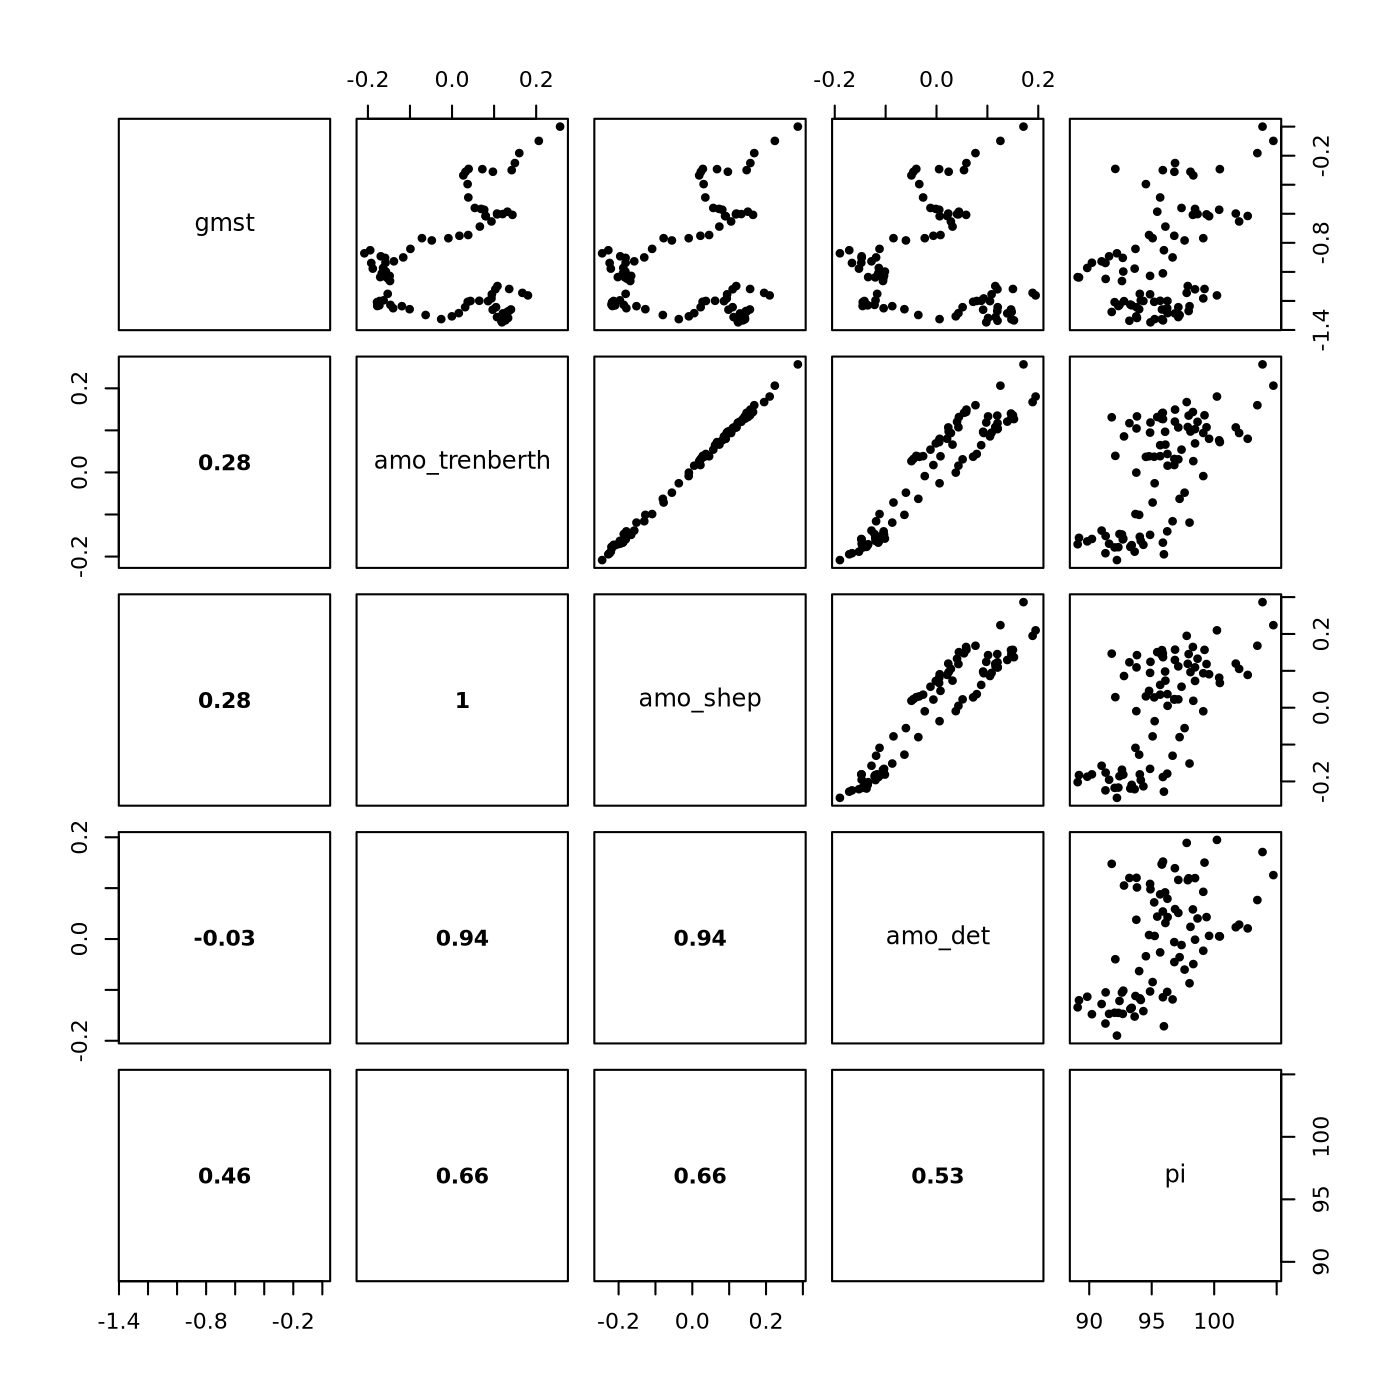

In [14]:
prep_window(h = 7, w = 7)
pairs(df[,-1], lower.panel = panel.cor)

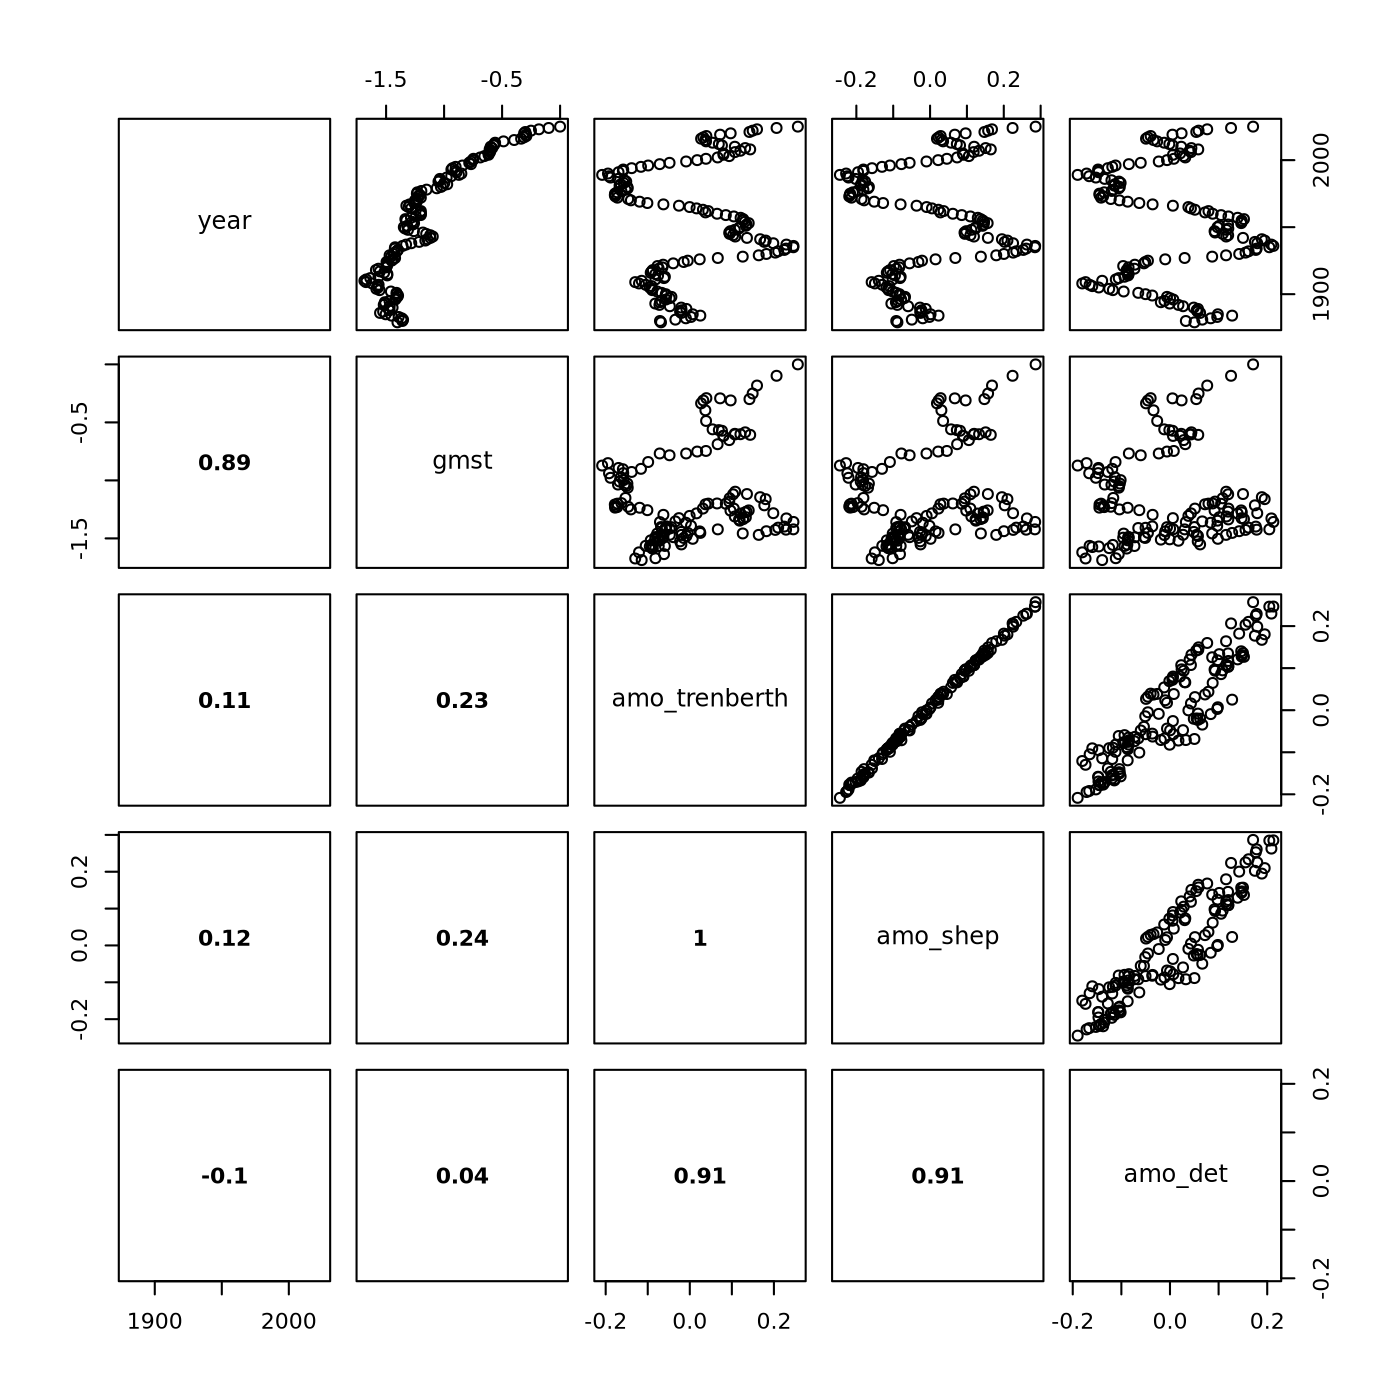

In [29]:
pairs(merge(gmst, amo), lower.panel = panel.cor)

In [34]:
sapply(list("GMST" = "gmst", "AMO" = "amo_det", "GMST + AMO" = c("gmst", "amo_det")), function(cnm) rsquared(fit_ns("norm", "shift", data = df, covnm = cnm, varnm = "pi", lower = F)))

,GMST,AMO,GMST + AMO
r2,0.2137197,0.2840206,0.5123307
r2.adj,0.2043592,0.2754971,0.5005796


In [35]:
summary(lm(pi ~ gmst * amo_det, df))


Call:
lm(formula = pi ~ gmst * amo_det, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6801 -1.3618  0.1324  1.3505  5.0755 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   99.1677     0.7579 130.849  < 2e-16 ***
gmst           3.4616     0.7796   4.440 2.78e-05 ***
amo_det       41.9725     9.2922   4.517 2.08e-05 ***
gmst:amo_det  23.9963     8.6982   2.759  0.00715 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.258 on 82 degrees of freedom
Multiple R-squared:  0.5537,	Adjusted R-squared:  0.5374 
F-statistic: 33.92 on 3 and 82 DF,  p-value: 2.351e-14


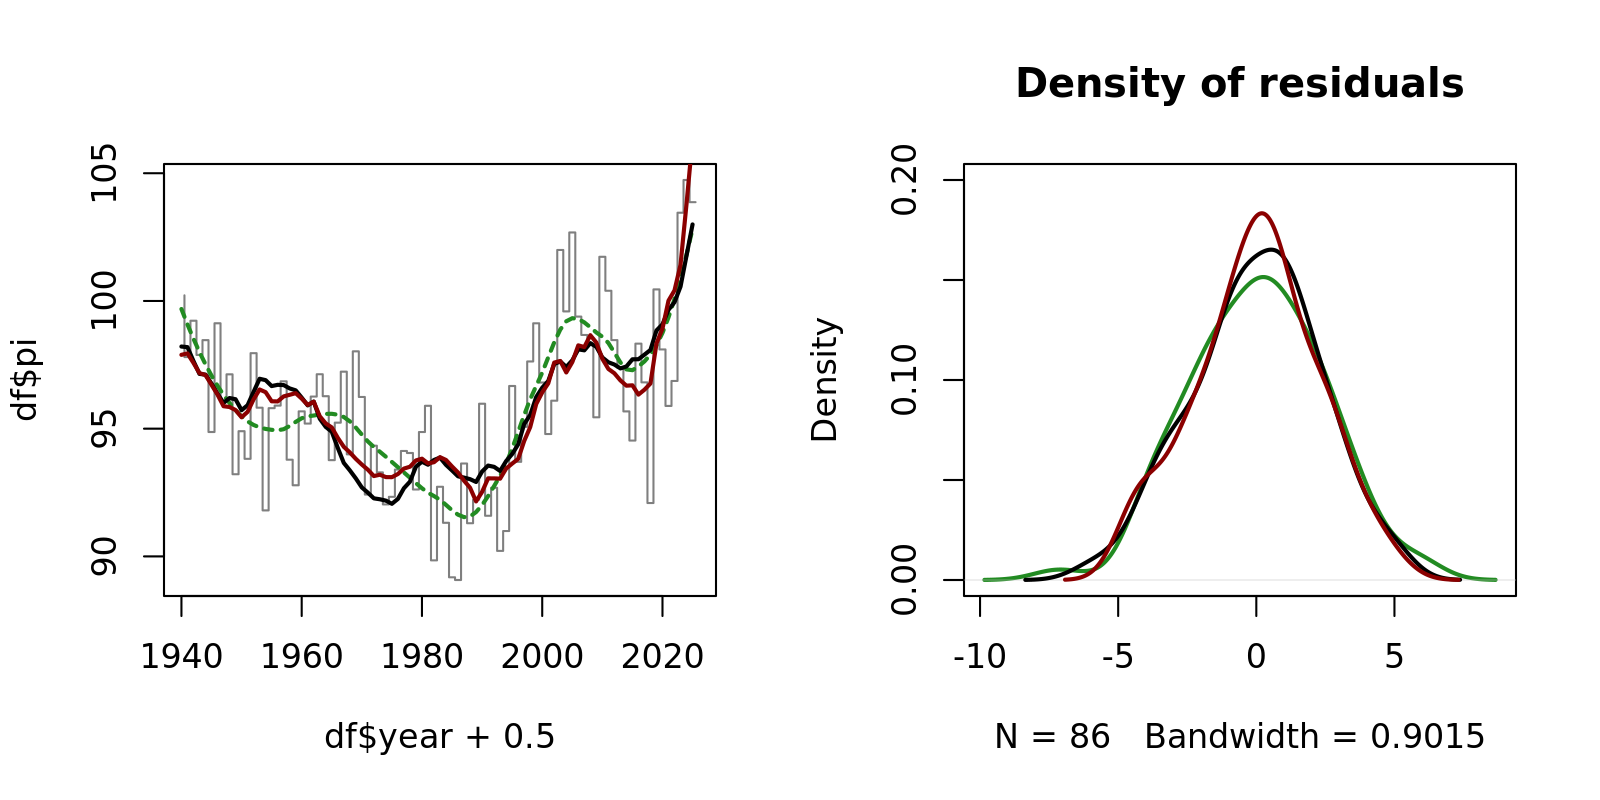

In [72]:
prep_window(c(1,2))

plot(df$year+0.5, df$pi, type = "S", col = adjustcolor("black", 0.5))
lines(df$year, fitted(loess("pi ~ year", df, span = 0.35)), col = "forestgreen", lwd = 2, lty = "22")

lines(df$year, fitted(lm(pi ~ gmst + amo_det, df)), lwd = 2)
lines(df$year, fitted(lm(pi ~ gmst * amo_det, df)), lwd = 2, col = "darkred")

plot(density(resid(loess("pi ~ year", df))), col = "forestgreen", ylim = c(0,0.2), lwd = 2, main = "Density of residuals")
lines(density(resid(lm(pi ~ gmst + amo_det, df))), col = "black", lwd = 2)
lines(density(resid(lm(pi ~ gmst * amo_det, df))), col = "darkred", lwd = 2)
